# Jupyter Notebooks for Teaching Neuroscience

Welcome! In this notebook, we'll explore how to use Jupyter to run Python code, a few examples of simple demonstrations using this code, and some analysis of open access data available via the Allen Institute for Brain Science.

### At the end of this notebook, you'll be able to:
* Recognize the main features of Jupyter Notebooks
* Edit and run code and markdown cells
* Run simple statistics and signal processing demonstrations
* Analyze data from the Allen Institute for Brain Science

### Table of Contents
[About Jupyter Notebooks](#about)

Three demonstrations of how one might use this type of notebook:
1. [Teaching Statistics](#one)
2. [Signal Processing](#two)
3. [Neural Data Science](#three)

<hr>

## Setup
Before we dive in, let's get this cell running. This cell will download the necessary components for working with the Allen Cell Types datasets below.

Run the cell below by clicking on it, and choosing the "Run" button above. Alternatively, you can press "shift + enter."

In [1]:
# This code is going to check to make sure you have the necessary packages.
try:
    import allensdk
except ImportError as e:
    !pip install allensdk

In Python, we also need to import packages to use. Below, we'll import several common packages for scientific computing: `numpy`, `pandas`, `scipy`, and `matplotlib`.

In [6]:
# Import our necessary toolboxes and tell matplotlib to plot inline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
print('Packages imported!')

<a id="about"></a>
## About Jupyter Notebooks

Jupyter notebooks are a way to combine executable code, code outputs, and text into one connected file. They run in a web browser, but don't require the internet (unless you're running it on a Jupyter Hub). 

The <b>'kernel'</b> is the thing that executes your code. It is what connects the notebook (as you see it) with the part of your computer, or the DataHub computers, that runs code.

### Menu Options & Shortcuts
To get a quick tour of the Jupyter user-interface, click on the 'Help' menu, then click 'User Interface Tour'. There are also a large number of useful keyboard shortcuts. Click on the 'Help' menu, and then 'Keyboard Shortcuts' to see a list.


### Types of Cells
Jupyter Notebooks have two types of cells, a <b>Markdown</b> (like this one) and <b>Code</b>. Most of the time you won't need to run the Markdown cells, just read through them. However, when we get to a code cell, you need to tell Jupyter to run the lines of code that it contains.

Code cells will be read by the Python interpreter. In other words, the Python kernel will run whatever it recognizes as code within the cell.

<span style="color:blue">When you're in <b>Command mode</b>, cells are outlined in blue</span>. <span style="color:green">When you're in <b>Edit mode</b>, blocks are outlined in green</span>.

<div class="alert alert-success"><b>Task:</b> Run the cell below!</div>

In [1]:
# In Python, anything with a "#" in front of it is code annotation,
# and is not read by the computer.
# You can run a cell (this box) by pressing shift-enter.
# Click in this cell and then press shift and enter simultaneously.
# This print function below allows us to generate a message.
print('Nice work!')

Nice work!


**Variables** enable us to store a value and come back to it later. They are defined with the syntax `name = value`.

<div class="alert alert-success"><b>Task:</b> Create two variables: <code>a</code> & <code>b</code>. Then, use an expression that combines <code>a</code> and <code>b</code>, and assign this to a new variable, <code>c</code>. In the end, <code>c</code> should be equal to 6.</div>

In [2]:
# Write your code here
a = 2
b = 3
c = a*b
print(c)

6


### Using Markdown
Markdown is useful because it can be formatted using simple symbols.
* You can create bulleted lists using asterisks.
* Similarly, you can create numbered lists using numbers.
* You can **bold** with two asterisks or underscores on either side (`**bold**`) or *italicize* with one asterisk or underscore (`*italicize*`)
* Pound signs (#) create headers. More pound signs means a smaller header.

<div class="alert alert-success"><b>Task:</b> Edit the markdown cell below with a quick biography of yourself. You should have your name as a big header, a short quippy subtitle for yourself as a smaller header, and a three bullet points that use both <b>bold</b> and <i>italic</i>.</div>

# You
### The fearless educator
- Learning how to use *Jupyter Notebooks*
- **Bold** and innovative
- Expanding your teaching practices

<a id="one"></a>
## Demo #1: Teaching Statistics

Notebooks like these can be useful for teaching statistical concepts, such as characterizing and describing distributions, hypothesis testing and the central limit theorem. Let's take a look at a way to test whether or not [the central limit theorem's depends on underlying distribution types](https://www.nature.com/articles/nmeth.2613).

In [4]:
# Decide on some parameters for our demonstration
sample_sizes = [3,9,27,81,243]
distribution_type = 'normal' # 'normal','skewed', or 'uniform'
mu = 0 # for the normal distribution
sigma = 10 # for the normal distribution
print('Parameters set.')

0


Since we're going to be generating distributions below based on our preferences, let's build a **function** to do this for us. We'll also take a look at what one of these distributions looks like.

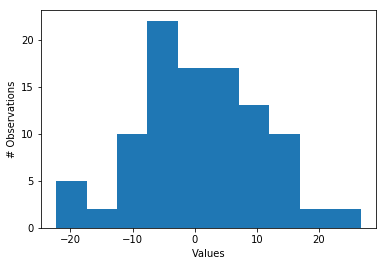

In [7]:
def createDistribution(distribution_type,mu,sigma,sample_size):
    if distribution_type == 'normal':
        sample_dist = np.random.normal(mu, sigma, sample_size) # Create a normal distribution with mu, sigma
    elif distribution_type == 'skewed':
        sample_dist = np.random.gamma(7.5,1,sample_size) # Create a skewed gamma distribution
    elif distribution_type == 'uniform':
        sample_dist = np.random.random_sample(sample_size)*20 # Create a uniform distribution
    return sample_dist

# Use our function to create a distribution
sample_dist = createDistribution(distribution_type,mu,sigma,sample_size=100)

# Plot our sample distribution
plt.hist(sample_dist)
plt.ylabel('# Observations')
plt.xlabel('Values')
plt.show()

Now that we've set up our parameters, let's demonstrate that the CLT is true regardless of the underlying distribution type. We'll also see that the increase in precision of our estimate of the population mean increases with sample size.

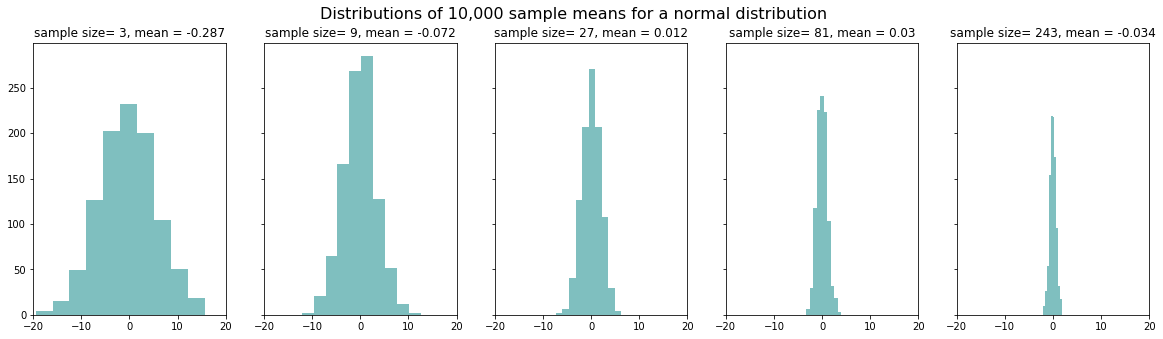

In [8]:
# Set up the figure
fig,ax = plt.subplots(1,5,figsize=(20,5),sharey=True)

sample_means = []

# For each subplot, create a plot.
for i in range(len(ax)):
    
    # Make the sample size = to 3^(a+1)
    sample_size = sample_sizes[i]
    
    # Calculate the mean of sample of sample_size designated above, 1000 times
    for x in range(1000):
        sample_dist = createDistribution(distribution_type,mu,sigma,sample_size) # Use our function above
        sample_means.append(np.mean(sample_dist)) # Append the mean of this distribution
        
    ax[i].hist(sample_means,color='teal',alpha = .5) # Plot the distribution of means
    ax[i].set_title('sample size= '+ str(sample_size)+', mean = '+ str(np.round(np.mean(sample_means),3)))
    ax[i].set_xlim([-20,20])
    sample_means = [] # Reset the sample means

plt.suptitle('Distributions of 10,000 sample means for a ' + distribution_type + ' distribution',fontsize=16)

plt.show()

Curious about other things you could simulate, including statistical tests? See an example notebook [here](https://github.com/BIPN162/Materials/blob/master/11-Statistics_solutions.ipynb).

<hr>

<a id="two"></a>
## Demo #2: Signal processing

Let's first generate a sine wave. We'll then generate a second sine wave and add these together to understand what a fourier transform of this data would look like. **Sine waves** are defined by their frequency, ampltitude, and and phase.

In [23]:
sampling_freq = 1024 # Sampling frequency
duration = 0.3 # 0.3 seconds of signal
freq1 = 7 # 7 Hz signal
freq2 = 130 # 130 Hz signal

time_vector = np.arange(0, duration, 1/sampling_freq) # Generate a time vector

signal_1 = np.sin(2 * np.pi * freq1 * time_vector)     # Generate a sine wave
signal_2 = np.sin(2 * np.pi * freq2 * time_vector) * 2 # Generate another sine wave, with double the power
# Add the signals we created above into one signal
combined_signal = signal_1 + signal_2

print('You\'ve created a complex signal with two sin waves, it looks like this:')
print(combined_signal)

You've created a complex signal with two sin waves, it looks like this:
[ 0.          1.47439991  2.08519495  1.48970011  0.07282654 -1.28516247
 -1.73971525 -0.9915122   0.53292413  1.93848187  2.40138863  1.66610567
  0.19943724 -1.09111077 -1.40482347 -0.53084714  1.02457393  2.34344933
  2.64978051  1.77764376  0.27124849 -0.94338912 -1.11709493 -0.12950467
  1.43829796  2.65429147  2.79773083  1.79391154  0.25921309 -0.87075038
 -0.90555508  0.18351981  1.74615215  2.84526973  2.82232648  1.69456043
  0.14458863 -0.89138407 -0.78833049  0.39055267  1.93196998  2.90282491
  2.71311393  1.47185272 -0.07867731 -1.01069639 -0.77059328  0.48712609
  1.99306173  2.82707791  2.47339433  1.13175262 -0.40305218 -1.22060289
 -0.84403858  0.48231033  1.94034552  2.63174967  2.11992873  0.69342222
 -0.80812029 -1.5004171  -0.98795545  0.39745719  1.79689699  2.34251012
  1.68108704  0.18717967 -1.26280101 -1.81923201 -1.17176498  0.26350358
  1.59508858  1.99394982  1.19365596 -0.34884385 -1.

Perhaps plotting the signal would be good, eh?

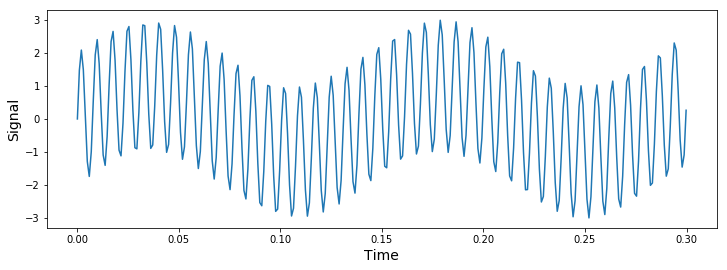

In [24]:
fig = plt.figure(figsize=(12, 4))
plt.plot(time_vector,signal_1+signal_2) #plot 0.5 seconds of data
plt.ylabel('Signal',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.show()

Below, we'll calculate the **Fourier Transform**, which will determine the frequencies that are in our sample. We'll implement this with [**Welch's Method**](https://en.wikipedia.org/wiki/Welch%27s_method), which consists in averaging consecutive Fourier transform of small windows of the signal, with or without overlapping. Basically, we calculate the fourier transform of a signal across a few sliding windows, and then calculate the mean PSD from all the sliding windows.

The `freqs` vector contains the x-axis (frequency bins) and the `psd` vector contains the y-axis values (power spectral density). The units of the power spectral density, when working with EEG data, is usually $\mu$V^2 per Hz.

/Users/ashley/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 4096 is greater than input length  = 308, using nperseg = 308
  .format(nperseg, input_length))


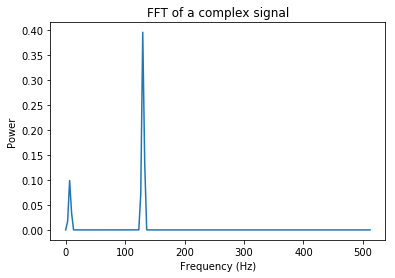

In [25]:
# Import our signal processing package
from scipy import signal

# Define sliding window length (4 seconds, which will give us 2 full cycles at 0.5 Hz)
win = 4 * sampling_freq
freqs, psd = signal.welch(combined_signal, sampling_freq, nperseg=win)

# Plot our data
plt.plot(freqs,psd) # Plot a select range of frequencies
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of a complex signal')
plt.show()

### Analyzing real sleep EEG Data

Normal physiological data is never as regular as the data above -- it's usually chock full of lots of different waves, as well as noise. Now that we have a sense of the tools we need, let's work with some real data.

The data we'll import here is a real 30-seconds extract of slow-wave sleep from a young individual, collected by the Walker Lab at UC Berkeley. This data was collected at 100 Hz from channel 'F3'. This sampling frequency is fine for EEG data, but wouldn't be enough for high frequency spiking data. That kind of data is typically sampled at 40 kHz.

In [12]:
import urllib.request

# URL of data to download
data_url = 'https://raphaelvallat.com/images/tutorials/bandpower/data.txt'

# Get the data and save it locally as "sleep_data.txt"
sleep_data, headers = urllib.request.urlretrieve(data_url, './sleep_data.txt')

# Load the .txt file as a numpy array
data = np.loadtxt('sleep_data.txt')

Now that we have the data, let's took a look at the raw signal.

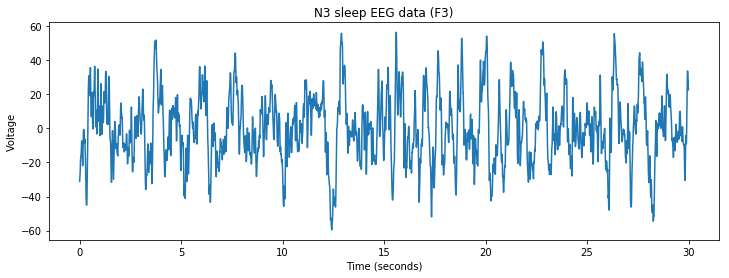

In [13]:
# Define sampling frequency and time vector, because this data is in samples, not timestamps
sampling_freq = 100 # sampling frequency
num_samples = len(data) # number of samples
time_vector = np.arange(num_samples) / sampling_freq # create a time vector

# Plot the signal
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(time_vector, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
plt.show()

In this real EEG data, the underlying frequencies are much harder to see by eye. So, we'll run a fourier transform (via Welch's method) on our data to put this into the frequency domain.

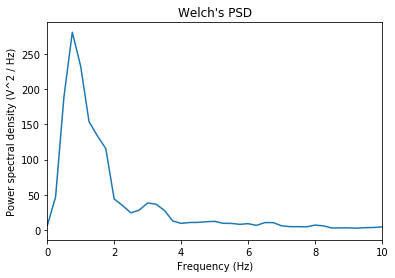

In [15]:
# Define sliding window length (4 seconds, which will give us 2 full cycles at 0.5 Hz)
win = 4 * sampling_freq
freqs, psd = signal.welch(data, sampling_freq, nperseg=win)

# Plot the power spectrum
plt.plot(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.xlim([0, 10]) # Uncomment this to restrict the x-axis so that we can zoom in
plt.title("Welch's PSD")
plt.show()

Sure enough, there is plenty of delta activity here (from 0.5 to 4 Hz)!

For additional ideas on how to incorporate signal processing into a Jupyter Notebook, see [this notebook](https://github.com/BIPN162/Materials_Solutions/blob/master/15-SignalProcessing_solutions.ipynb).

<hr>

<a id="three"></a>
## Neural Data Science
As a final demonstration, we'll look at electrophysiology data from the Allen Institute's [Cell Types Atlas](https://celltypes.brain-map.org/). This is just one of many incredible [datasets](https://portal.brain-map.org/) available from the Allen Institute for Brain Science.

**Note**: If you run the cell below and receive an error related to pandas and, create a new cell and run `!pip install pandas==0.23.4`.

In [16]:
# Import the necessary toolboxes from the AllenSDK
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Get the human metadata, turn it into a dataframe, and set the index to be ID
# In this line, you can also specify a specific cre line, or experiment.
human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN])).set_index('id')

# Get the ephys data, turn it into a dataframe, and set the index to be specimen ID
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')

# Join the two dataframes
human_ephys_df = human_df.join(ephys_features)

# Show the first 5 rows
human_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


Now that we have the data, let's plot two of the features in our dataset:
- **Action potential fast trough** (`fast_trough_v_long_square`): Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
- **Upstroke/downstroke ratio** (`upstroke_downstroke_ratio_long_square`): The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.

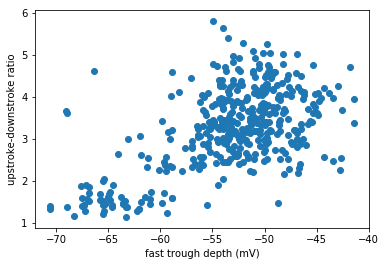

In [17]:
plt.scatter(human_ephys_df['fast_trough_v_long_square'], 
            human_ephys_df['upstroke_downstroke_ratio_long_square'])
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.show()

It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably **excitatory (spiny)** cells or **inhibitory (aspiny)** cells. Let's color our dots by their dendrite type!

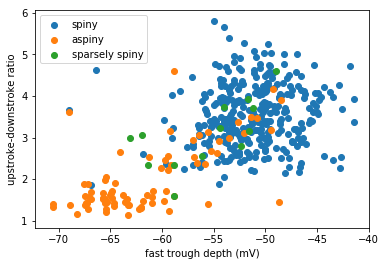

In [18]:
# Get possible dendrite types
dendrite_types = human_ephys_df['dendrite_type'].unique()

fig = plt.figure()

for d_type in dendrite_types:
    
    df = human_ephys_df[human_ephys_df['dendrite_type'] == d_type]
    
    plt.scatter(df['fast_trough_v_long_square'], 
                df['upstroke_downstroke_ratio_long_square'],
                label=d_type)
    
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.legend(loc='best') 
    
plt.show()

Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

More discoveries abound! For a full notebook explaining how to interact with the Cell Types dataset, see [this repository](https://github.com/ajuavinett/CellTypesLesson). For additional ideas about how to work with the Allen Institute data in your classes, see [this website](https://sites.google.com/ucsd.edu/neuroedu).

## Celebrate
That's the **Teaching with Jupyter Notebooks tutorial**! Go forth and share :)

In [19]:
from IPython.display import HTML
HTML('<img src="https://media1.tenor.com/images/f708e56b6ab99de21228c95203c7af8e/tenor.gif">')

## Resources
For additional Jupyter Notebook information and practice, see [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) from DataQuest. 

## About this Notebook
This notebook was created by [Ashley Juavinett](https://github.com/ajuavinett) for a workshop during the Faculty for Undergraduate Neuroscience Summer Virtual Meeting.